In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [17]:
df = pd.read_csv(r"./car_done.csv")
df.head()
y = df['Price_in_thousands']
df.drop(columns=['Price_in_thousands'])

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,Acura,Integra,16.919,16.360,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,Acura,TL,39.384,19.875,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,2,Acura,CL,14.114,18.225,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,3,Acura,RL,8.588,29.725,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,4,Audi,A4,20.397,22.255,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,Volvo,V40,3.545,NaN,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,153,Volvo,S70,15.245,NaN,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,154,Volvo,V70,17.531,NaN,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,155,Volvo,C70,3.493,NaN,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [18]:
df.dropna(subset=['Price_in_thousands'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              155 non-null    int64  
 1   Manufacturer            155 non-null    object 
 2   Model                   155 non-null    object 
 3   Sales_in_thousands      155 non-null    float64
 4   four_year_resale_value  119 non-null    float64
 5   Vehicle_type            155 non-null    object 
 6   Price_in_thousands      155 non-null    float64
 7   Engine_size             155 non-null    float64
 8   Horsepower              155 non-null    float64
 9   Wheelbase               155 non-null    float64
 10  Width                   155 non-null    float64
 11  Length                  155 non-null    float64
 12  Curb_weight             154 non-null    float64
 13  Fuel_capacity           155 non-null    float64
 14  Fuel_efficiency         153 non-null    float64

In [20]:
import category_encoders as ce
encoder = ce.TargetEncoder()
df.loc[:,'Model'] = encoder.fit_transform(X=df['Model'],y=df['Sales_in_thousands'])
df.loc[:,'Vehicle_type'] = encoder.fit_transform(X=df['Vehicle_type'],y=df['Sales_in_thousands'])
df.loc[:,'Latest_Launch'] = encoder.fit_transform(X=df['Latest_Launch'],y=df['Sales_in_thousands'])

In [21]:
df['PriceResaleDrop'] = (df['Price_in_thousands']-df['four_year_resale_value'])/df['Price_in_thousands']
meanDif = df[df['four_year_resale_value'].notna()].groupby('Manufacturer')['PriceResaleDrop'].mean()
def fillResale(row):
    if pd.isna(row['four_year_resale_value']):
        # Use the formula: FourYearResale = Price - mean(Price - FourYearResale) for that manufacturer
        if(row['Manufacturer'] in meanDif.index):
            return row['Price_in_thousands'] - meanDif.loc[row['Manufacturer']]*row['Price_in_thousands']
        else:
            return row['Price_in_thousands'] - 0.2*row['Price_in_thousands']
    else:
        return row['four_year_resale_value']
df.loc[:,'four_year_resale_value'] = df.apply(fillResale, axis=1)
df.loc[:,'Manufacturer'] = encoder.fit_transform(X=df['Manufacturer'],y=df['Sales_in_thousands'])
df.loc[:,'PriceResaleDrop'] = (df['Price_in_thousands']-df['four_year_resale_value'])/df['Price_in_thousands']

In [22]:
df.head()

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,PriceResaleDrop
0,0,48.362336,48.519404,16.919,16.360,43.488296,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,48.519404,58.280150,0.239070
1,1,48.362336,51.44229,39.384,19.875,43.488296,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,51.44229,91.370778,0.300176
3,3,48.362336,47.43547,8.588,29.725,43.488296,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,47.43547,91.389779,0.292262
4,4,47.109417,48.971921,20.397,22.255,43.488296,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,48.971921,62.777639,0.072322
5,5,47.109417,48.761535,18.780,23.555,43.488296,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,48.761535,84.565105,0.306186


In [23]:
df.describe()

,Unnamed: 0,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,PriceResaleDrop
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,153.000000,155.000000,155.000000
mean,78.780645,53.245832,19.319542,27.390755,3.060000,185.696774,107.490968,71.153548,187.313548,3.377429,17.956774,23.830065,77.043591,0.305587
std,45.196723,68.397550,11.755335,14.351653,1.047979,56.796444,7.665925,3.462776,13.470034,0.632515,3.900050,4.293187,25.142664,0.114126
min,0.000000,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,0.004345
25%,40.500000,14.074500,12.025000,18.017500,2.300000,149.000000,103.000000,68.400000,177.550000,2.969000,15.800000,21.000000,60.407707,0.203593
50%,79.000000,29.450000,15.445000,22.799000,3.000000,175.000000,107.000000,70.500000,187.800000,3.341000,17.200000,24.000000,72.030917,0.336867
75%,117.500000,68.183500,22.127500,31.947500,3.650000,215.000000,112.200000,73.450000,196.150000,3.810250,19.650000,26.000000,89.414878,0.396631
max,156.000000,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,0.520889


In [24]:
df.corr()

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,PriceResaleDrop
Unnamed: 0,1.000000,-0.213746,-0.127660,-0.131168,0.052651,0.060146,-0.029063,-0.259679,-0.196525,-0.259450,-0.285329,-0.306526,-0.154723,-0.134732,0.090920,-0.101502,-0.166241,-0.314776
Manufacturer,-0.213746,1.000000,0.655642,0.657823,-0.339750,0.280132,-0.306951,0.072742,-0.169585,0.212939,0.162381,0.168866,0.004777,0.102709,-0.061610,0.596590,-0.202295,0.270349
Model,-0.127660,0.655642,1.000000,0.999349,-0.331024,0.242839,-0.304953,0.020492,-0.195862,0.358506,0.140598,0.256781,0.009138,0.085954,-0.014908,0.876244,-0.223417,0.201786
Sales_in_thousands,-0.131168,0.657823,0.999349,1.000000,-0.330789,0.242693,-0.304734,0.020499,-0.195716,0.358279,0.140489,0.256633,0.009184,0.085925,-0.014922,0.877704,-0.223252,0.201640
four_year_resale_value,0.052651,-0.339750,-0.331024,-0.330789,1.000000,-0.073108,0.957154,0.491959,0.751532,-0.014987,0.191030,0.010032,0.390776,0.332044,-0.404988,-0.308327,0.816565,-0.432662
Vehicle_type,0.060146,0.280132,0.242839,0.242693,-0.073108,1.000000,-0.044145,0.259712,0.007326,0.388156,0.245872,0.136782,0.523962,0.597471,-0.574238,0.261457,-0.001047,0.044435
Price_in_thousands,-0.029063,-0.306951,-0.304953,-0.304734,0.957154,-0.044145,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,-0.293802,0.897945,-0.183758
Engine_size,-0.259679,0.072742,0.020492,0.020499,0.491959,0.259712,0.626875,1.000000,0.838104,0.472233,0.690632,0.541367,0.760010,0.663308,-0.735718,-0.004106,0.818528,0.214394
Horsepower,-0.196525,-0.169585,-0.195862,-0.195716,0.751532,0.007326,0.839744,0.838104,1.000000,0.287100,0.540748,0.392571,0.610489,0.501606,-0.615094,-0.219992,0.992994,0.016391
Wheelbase,-0.259450,0.212939,0.358506,0.358279,-0.014987,0.388156,0.110513,0.472233,0.287100,1.000000,0.683124,0.840156,0.651142,0.654040,-0.498121,0.330734,0.258852,0.313367


In [25]:
df.loc[:,'Sales_in_thousands'] = np.log1p(df['Sales_in_thousands'])
df.loc[:,'Engine_size'] = np.log(df['Engine_size'])
df.loc[:,'Fuel_capacity'] = np.log(df['Fuel_capacity'])
df.loc[:,'Fuel_efficiency'] = np.log(df['Fuel_efficiency'])
df.loc[:,'Horsepower'] = np.log(df['Horsepower'])
df.loc[:,'Power_perf_factor'] = np.log(df['Power_perf_factor'])


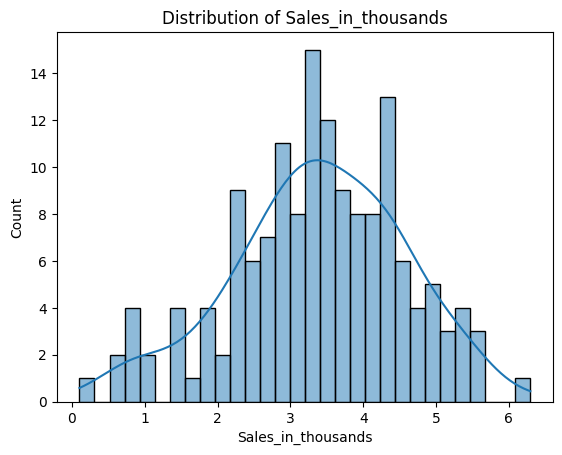

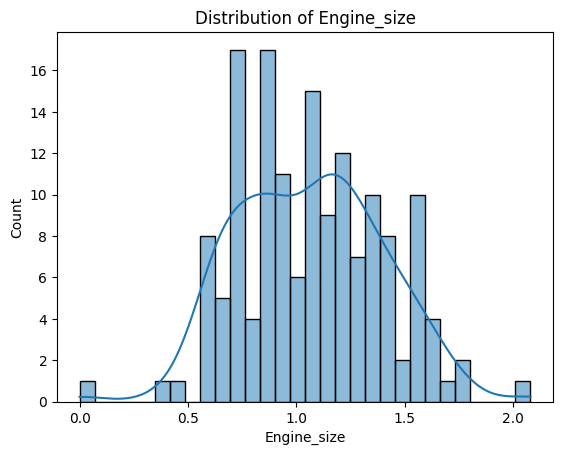

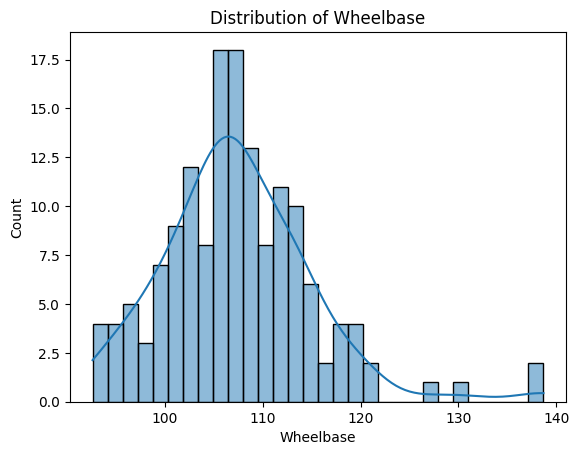

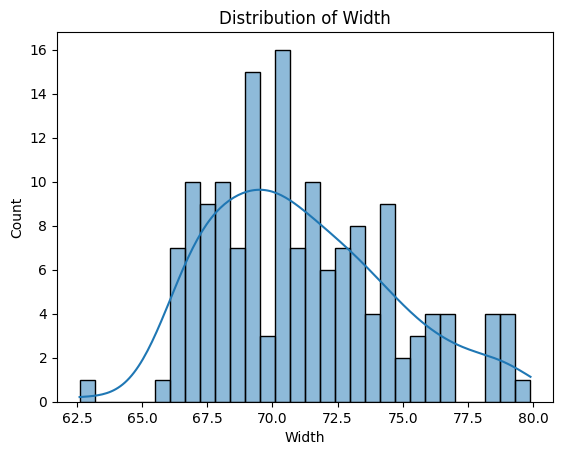

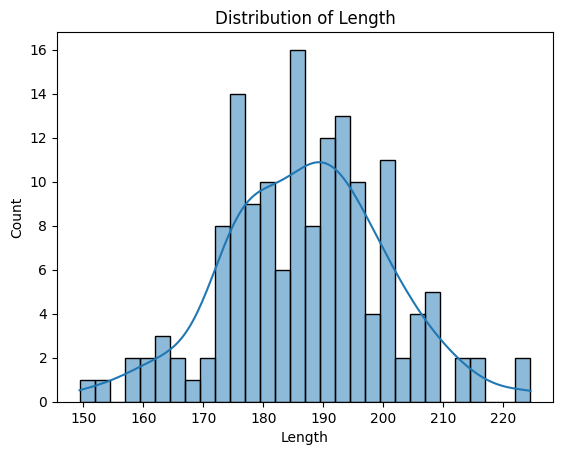

In [32]:
for col in ['Sales_in_thousands','Engine_size','Wheelbase','Width','Length']:
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

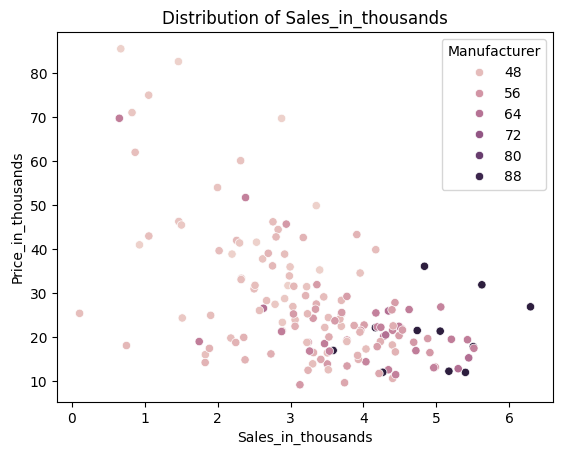

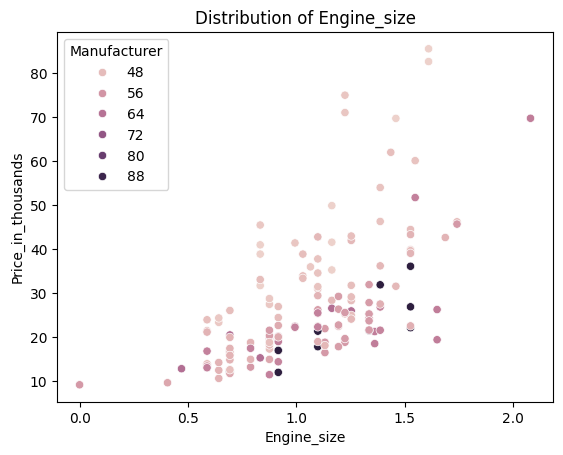

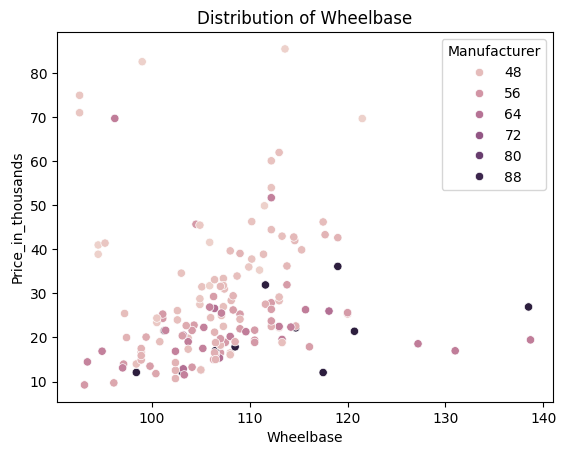

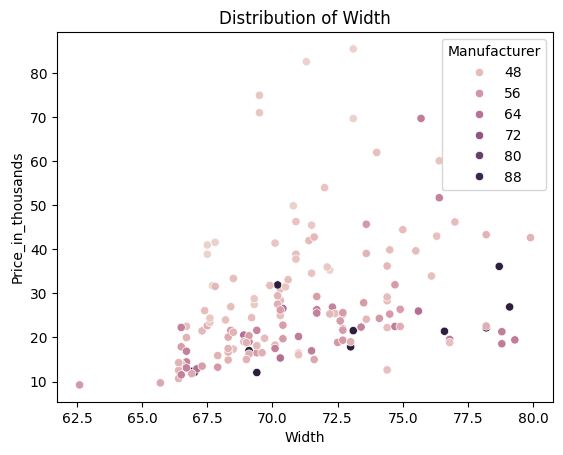

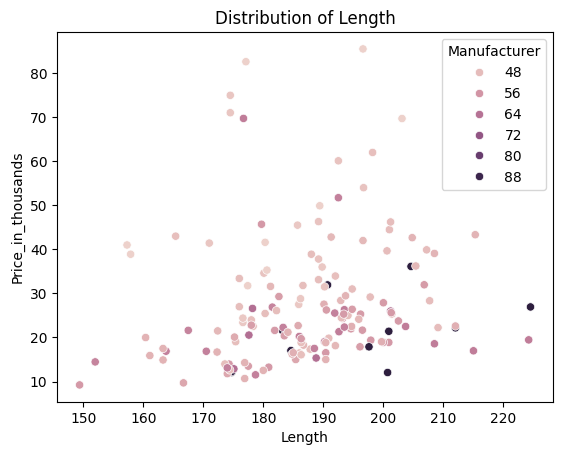

In [27]:
for col in ['Sales_in_thousands','Engine_size','Wheelbase','Width','Length']:
    sns.scatterplot(x=df[col],y=y,hue=df['Manufacturer'])
    plt.title(f'Distribution of {col}')
    plt.show()

In [28]:
df.dropna(inplace=True)

In [29]:
y = df['Price_in_thousands']
x = df.drop(columns=['Price_in_thousands','Wheelbase','Width','Length','Latest_Launch','Fuel_capacity','Horsepower','Model'])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
y = np.array(y)
x = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
y_train_s = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_s = scaler.fit_transform(y_test.reshape(-1,1)).ravel()
lr = LinearRegression()
lr.fit(x_train_s,y_train_s)
y_pred = lr.predict(x_test_s)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).ravel()
#y_test = scaler.inverse_transform(y_test_s.reshape(-1,1)).ravel()
print("R2 score: ",r2_score(y_pred=y_pred,y_true=y_test))
print("100-MAPE: ",100-mean_absolute_percentage_error(y_pred,y_test))

R2 score:  0.9769155967429315
100-MAPE:  99.95204102807516
